In [19]:
import umap.umap_ as umap
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import seaborn as sns 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns #% matplotlib inline
from art import tprint
from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import plotly.express as px
import pylab
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split # для манипулирования данными

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import confusion_matrix
import umap.umap_ as umap
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import seaborn as sns 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns #% matplotlib inline
from art import tprint
from imblearn.over_sampling import SMOTE
from collections import Counter

url ="C:\\Users\\Admin\\Desktop\\datases\\UMAP\\soybean-large.data"  # hone pc
url_2= "C:\\Users\\Admin\\Desktop\\datases\\UMAP\\soybean-large.names"  # hone pc


# url ="C:\\Users\\Дмитрий\\Desktop\\datasets\\bob\\soybean-large.data"  # laptop
# url_2= "C:\\Users\\Дмитрий\\Desktop\\datasets\\bob\\soybean-large.names"  # laptop

In [20]:
def tsne_func(df):
    scaler = MinMaxScaler()
# X= scaler.fit_transform(y_pred_SVM)

    embed = TSNE(
        n_components=2, # значение по умолчанию=2. Размерность вложенного пространства.
        perplexity=20, # значение по умолчанию=30.0. Перплексия связана с количеством ближайших соседей, которое используется в других алгоритмах обучения на множествах.
        early_exaggeration=12, # значение по умолчанию=12.0. Определяет, насколько плотными будут естественные кластеры исходного пространстве во вложенном пространстве и сколько места будет между ними. 
        learning_rate=200, # значение по умолчанию=200.0. Скорость обучения для t-SNE обычно находится в диапазоне [10.0, 1000.0]. Если скорость обучения слишком высока, данные могут выглядеть как "шар", в котором любая точка приблизительно равноудалена от ближайших соседей. Если скорость обучения слишком низкая, большинство точек могут быть похожими на сжатое плотное облако с незначительным количеством разбросов. 
        n_iter=5000, # значение по умолчанию=1000. Максимальное количество итераций для оптимизации. Должно быть не менее 250.
        n_iter_without_progress=300, # значение по умолчанию=300. Максимальное количество итераций без прогресса перед прекращением оптимизации, используется после 250 начальных итераций с ранним преувеличением.
        min_grad_norm=0.0000001, # значение по умолчанию=1e-7. Если норма градиента ниже этого порога, оптимизация будет остановлена.
        metric='euclidean', # значение по умолчанию='euclidean', Метрика, используемая при расчете расстояния между экземплярами в массиве признаков.
        init='random',# {'random', 'pca'} или ndarray формы (n_samples, n_components), значение по умолчанию='random'. Инициализация вложения.
        verbose=0, # значение по умолчанию=0. Уровень детализации.
        random_state=42, # экземпляр RandomState или None, по умолчанию=None. Определяет генератор случайных чисел. Передача int для воспроизводимых результатов при многократном вызове функции.
        method='barnes_hut', # значение по умолчанию='barnes_hut'. По умолчанию алгоритм вычисления градиента использует аппроксимацию Барнса-Хата, работающую в течение времени O(NlogN). метод='exact' будет работать по более медленному, но точному алгоритму за время O(N^2). Следует использовать точный алгоритм, когда количество ошибок ближайших соседей должно быть ниже 3%.
        angle=0.5, # значение по умолчанию=0.5. Используется только если метод='barnes_hut' Это компромисс между скоростью и точностью в случае T-SNE с применением алгоритма Барнса-Хата.
        n_jobs=-1, # значение по умолчанию=None. Количество параллельных заданий для поиска соседей. -1 означает использование всех процессоров.
            )

    # Преобразование X
    X_embedded = embed.fit_transform(df.reshape(-1, 1))
    return X_embedded

def umap_function(df, method='MinMax'):

    # if method=='MinMax':
    #     scaler = MinMaxScaler()
    # elif method=='Standard':
    #     scaler = preprocessing.StandardScaler()
    # else:
    #     scaler = preprocessing.RobustScaler()
    
    # X= scaler.fit_transform(df.reshape(-1, 1))



    manifold = umap.UMAP()#.fit(X)
    X_reduced = manifold.fit_transform(df.reshape(-1, 1))
    return X_reduced

In [21]:
col_names = [   "class","date", "plant-stand", "precip", "temp", "hail", "crop-hist", "area-damaged", "severity", "seed-tmt", "germination", "plant-growth", 
                "leaves","leafspots-halo", "leafspots-marg", "leafspot-size", "leaf-shread", "leaf-malf", "leaf-mild", "stem", "lodging", "stem-cankers",
                "canker-lesion", "fruiting-bodies", "external decay", "mycelium", "int-discolor", "sclerotia", "fruit-pods", "fruit spots", "seed",
                "mold-growth", "seed-discolor", "seed-size", "shriveling", "roots"
            ]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Read data from URL
bob = pd.read_csv(url, names=col_names)
color=list(bob)
bob=bob.replace("?",0)
bob=bob.dropna()

for i in list(bob):
    try:
        bob[i]=bob[i].str.strip() 
    except:
        print(i)

list_class=bob['class'].to_list()
dict_class={}
a=1
for i in list_class:
 
    if i not in dict_class.keys():
        dict_class[i]=a
        a+=1
# bob=bob.fillna(0)
bob=bob.dropna()
bob['class']=bob['class'].apply(lambda x: dict_class[x] )  
bob=bob.dropna()
bob= bob[ (bob['class']== 6) |(bob['class']== 11) |(bob['class']== 7) | (bob['class']==10 ) |(bob['class']== 9) |(bob['class']== 3) ] # (bob['class']==2 ) |

predictors, target =bob[color[1:]], bob['class'] #  делим на то что есть и на то что предсказать 

x_train , x_test , y_train, y_test = train_test_split(predictors['date'], target, random_state=100, test_size = 0.5) # 1А разбить выборку на тренировочную и тестовую 
X, y = train_test_split(bob, random_state=100)
x_test=x_test.values.reshape(-1, 1)

print(Counter(x_train)) # узнать сколько классов 

# y_train=y_train[y_train[]]

leaves
Counter({'4': 9, '1': 5, '5': 5, '3': 4, '6': 3, '0': 2, '2': 2})


In [22]:

predictors, target =bob[color[1:]], bob['class'] #  делим на то что есть и на то что предсказать 
x_train , x_test , y_train, y_test = train_test_split(predictors, target, random_state=0) # 1А разбить выборку на тренировочную и тестовую 
X, y = train_test_split(bob, random_state=100)

In [23]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train) 

In [24]:
x_train.values.reshape(-1, 1)
y_train.ravel()

array([10, 10,  3,  6,  9, 11,  7, 10, 11,  6, 11,  7,  6,  3,  9,  6, 11,
        7, 11,  3,  6,  7,  9,  6, 10, 10, 11,  9,  3,  6, 10,  7,  3,  7,
        9,  7,  6,  3,  9, 11,  3,  3, 11, 10, 10,  7,  9,  9],
      dtype=int64)

In [25]:
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import BorderlineSMOTE

# x_train=x_train.to_frame()
sm = SMOTE( k_neighbors = 2, random_state = 100) 
X_diver_res, y_diver_res = sm.fit_resample(x_train, y_train.ravel())  # из массива массивов делает одномерный массив (ravel)
sm = BorderlineSMOTE( k_neighbors = 2,random_state=100, kind='borderline-1')
X_res, y_res = sm.fit_resample(x_train, y_train.ravel())

sm = BorderlineSMOTE( k_neighbors = 2,random_state=100, kind='borderline-1')
X_res_2, y_res_2 = sm.fit_resample(x_train, y_train.ravel()) # .values.reshape(-1, 1)


In [26]:
for x_new_train,y_new_train, version in zip([x_train, X_diver_res, X_res, X_res_2],[y_train, y_diver_res, y_res, y_res_2], ['ДЕФОЛТ','SMOTE','borderline-SMOTE ','borderline-SMOTE _2']): 
    try:
        x_new_train=x_new_train.values.reshape(-1, 1)
    except:
        ...

    params={'kernel':['linear','rbf' ,  'poly', 'sigmoid'], 'C': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}

    clf_1_SVC = svm.SVC(kernel='linear')
    clf_2_SVC = svm.SVC(kernel='rbf') 
    clf_3_SVC = svm.SVC(kernel='poly')
    clf_predict=clf_1_SVC.fit(x_new_train,y_new_train)
    clf_predict_2=clf_2_SVC.fit(x_new_train,y_new_train)
    clf_predict_3=clf_3_SVC.fit(x_new_train,y_new_train)
    clf_SVC = svm.SVC()
    y_pred_SVM= clf_predict.predict(x_test)
    y_pred_SVM_2= clf_predict_2.predict(x_test)
    y_pred_SVM_3= clf_predict_3.predict(x_test)





    knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
    knn_2 = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
    knn_3 = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
    knn_model = knn.fit(x_new_train,y_new_train)
    knn_model_2 = knn_2.fit(x_new_train,y_new_train)
    knn_model_3 = knn_3.fit(x_new_train,y_new_train)
    y_pred_KNN = knn.predict(x_test)
    y_pred_KNN_2 = knn_2.predict(x_test)
    y_pred_KNN_3 = knn_3.predict(x_test)
    params={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
    grid_search= GridSearchCV(estimator=knn, param_grid=params)
    grid_search.fit(x_new_train,y_new_train)






    random_forest = RandomForestClassifier(n_estimators=100 , criterion='gini')
    random_forest_2 = RandomForestClassifier(n_estimators=100, criterion='entropy' )
    random_forest_3 = RandomForestClassifier(n_estimators=100 , criterion='log_loss')
    random_forest.fit(x_new_train,y_new_train)
    random_forest_2.fit(x_new_train,y_new_train)
    random_forest_3.fit(x_new_train,y_new_train)
    y_pred_RF = random_forest.predict(x_test)
    y_pred_RF_2 = random_forest_2.predict(x_test)
    y_pred_RF_3 = random_forest_3.predict(x_test)



    params= {'criterion':['gini', 'entropy', 'log_loss'] }
    grid_search= GridSearchCV(estimator=random_forest, param_grid=params)
    grid_search.fit(x_new_train,y_new_train)



    metrics = []
    models =  ['SVM' , 'KNN', 'Random_Forest']
    predictions=[y_pred_SVM, y_pred_KNN, y_pred_RF]
    tprint(version)
    for lab,i in zip(models, predictions):
        precision, recall, fscore, _ = score(y_test, i, average='weighted')
        accuracy = accuracy_score(y_test, i)

        
        metrics.append(pd.Series({  'precision':precision,  # Точность 
                                    'recall':recall, # полнота  
                                    'fscore':fscore,
                                    'accuracy':accuracy,}, name=lab))

    metrics = pd.concat(metrics, axis=1)

    print(metrics)

ValueError: Found input variables with inconsistent numbers of samples: [1680, 48]

## F-мера является хорошим кандидатом на формальную метрику оценки качества классификатора. Она сводит к одному числу две других основополагающих метрики: точность и полноту. Имея в своем распоряжении подобный механизм оценки вам будет гораздо проще принять решение о том являются ли изменения в алгоритме в лучшую сторону или нет.

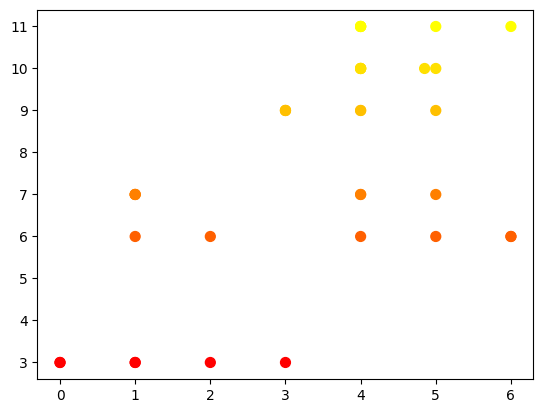

In [ ]:


plt.scatter(X_diver_res.reshape(1, -1)[0,:] ,y_diver_res , c=[i for i in y_diver_res], s=50, cmap='autumn')

In [ ]:
X_diver_res.reshape(1, -1)[0,:]

array([3.        , 4.        , 1.        , 6.        , 1.        ,
       4.        , 0.        , 4.        , 5.        , 1.        ,
       5.        , 2.        , 2.        , 3.        , 4.        ,
       5.        , 4.        , 4.        , 6.        , 3.        ,
       3.        , 5.        , 5.        , 4.        , 6.        ,
       4.        , 4.        , 0.        , 1.        , 1.        ,
       1.        , 4.        , 4.        , 4.85139516, 4.        ,
       4.        ])

In [ ]:
y_diver_res

array([ 9, 10,  6,  6,  3,  9,  3,  7, 10,  7,  7,  3,  6,  9, 11, 11, 11,
        6, 11,  3,  9,  9,  6, 10,  6,  7,  9,  3,  7,  3,  7, 10, 10, 10,
       11, 11], dtype=int64)

In [ ]:
params={'kernel':['linear','rbf' ,  'poly', 'sigmoid'], 'C': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}


clf_1_SVC = svm.SVC(kernel='linear')
clf_2_SVC = svm.SVC(kernel='rbf') 
clf_3_SVC = svm.SVC(kernel='poly')
clf_predict=clf_1_SVC.fit(x_train,y_train)
clf_predict_2=clf_2_SVC.fit(x_train,y_train)
clf_predict_3=clf_3_SVC.fit(x_train,y_train)

clf_SVC = svm.SVC()
y_pred_SVM= clf_predict.predict(x_test)
y_pred_SVM_2= clf_predict_2.predict(x_test)
y_pred_SVM_3= clf_predict_3.predict(x_test)

# grid_search= GridSearchCV(estimator=clf_SVC, param_grid=params)
# grid_search.fit(x_train,y_train)
# grid_search
# print(str(grid_search.best_score_))
# print(str(grid_search.best_estimator_))

# y_pred_SVM= grid_search.predict(x_test)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
knn_2 = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn_3 = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')

knn_model = knn.fit(x_train, y_train)
knn_model_2 = knn_2.fit(x_train, y_train)
knn_model_3 = knn_3.fit(x_train, y_train)

y_pred_KNN = knn.predict(x_test)
y_pred_KNN_2 = knn_2.predict(x_test)
y_pred_KNN_3 = knn_3.predict(x_test)


params={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_search= GridSearchCV(estimator=knn, param_grid=params)
grid_search.fit(x_train,y_train)
print(str(grid_search.best_score_))
print(str(grid_search.best_estimator_))



In [ ]:
random_forest = RandomForestClassifier(n_estimators=100 , criterion='gini')
random_forest_2 = RandomForestClassifier(n_estimators=100, criterion='entropy' )
random_forest_3 = RandomForestClassifier(n_estimators=100 , criterion='log_loss')
random_forest.fit(x_train, y_train)
random_forest_2.fit(x_train, y_train)
random_forest_3.fit(x_train, y_train)
y_pred_RF = random_forest.predict(x_test)
y_pred_RF_2 = random_forest_2.predict(x_test)
y_pred_RF_3 = random_forest_3.predict(x_test)



params= {'criterion':['gini', 'entropy', 'log_loss'] }
grid_search= GridSearchCV(estimator=random_forest, param_grid=params)
grid_search.fit(x_train,y_train)
print(str(grid_search.best_score_))
print(str(grid_search.best_estimator_))

In [ ]:
print('\n##################Последнее задание ######################\n')
metrics = []
models =  ['SVM' , 'KNN', 'Random_Forest']
predictions=[y_pred_SVM, y_pred_KNN, y_pred_RF]

for lab,i in zip(models, predictions):
    precision, recall, fscore, _ = score(y_test, i, average='weighted')
    accuracy = accuracy_score(y_test, i)

    
    metrics.append(pd.Series({  'precision':precision, 
                                'recall':recall,
                                'fscore':fscore,
                                'accuracy':accuracy,}, name=lab))

metrics = pd.concat(metrics, axis=1)

print(metrics)


In [ ]:


x_df1=pd.DataFrame(tsne_func(y_pred_SVM), columns=['x1','x2']) # y_pred_SVM_2
x_df2=pd.DataFrame(tsne_func(y_pred_SVM_2), columns=['x1','x2']) 
x_df3=pd.DataFrame(tsne_func(y_pred_SVM_3), columns=['x1','x2']) 
tprint("TSNE   SVM")
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(25, 5)) #linear rbf poly
ax1.set_title('SVM linear')
ax2.set_title('SVM rbf')
ax3.set_title('SVM poly')

sns.kdeplot(x_df1['x1'], ax = ax1, color ='black')
sns.kdeplot(x_df1['x2'], ax = ax1, color ='red')

sns.kdeplot(x_df2['x1'], ax = ax2, color ='black')
sns.kdeplot(x_df2['x2'], ax = ax2, color ='red')

sns.kdeplot(x_df3['x1'], ax = ax3, color ='black')
sns.kdeplot(x_df3['x2'], ax = ax3, color ='red')

plt.show()


y_df1=pd.DataFrame(tsne_func(y_pred_KNN), columns=['x1','x2']) # y_pred_SVM_2
y_df2=pd.DataFrame(tsne_func(y_pred_KNN_2), columns=['x1','x2']) 
y_df3=pd.DataFrame(tsne_func(y_pred_KNN_3), columns=['x1','x2']) 
tprint("TSNE   KNN")
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(25, 5)) #linear rbf poly
ax1.set_title('KNN auto') #'auto', 'ball_tree', 'kd_tree',
ax2.set_title('KNN rbf')
ax3.set_title('KNN ball_tree')

sns.kdeplot(y_df1['x1'], ax = ax1, color ='black')
sns.kdeplot(y_df1['x2'], ax = ax1, color ='red')

sns.kdeplot(y_df2['x1'], ax = ax2, color ='black')
sns.kdeplot(y_df2['x2'], ax = ax2, color ='red')

sns.kdeplot(y_df3['x1'], ax = ax3, color ='black')
sns.kdeplot(y_df3['x2'], ax = ax3, color ='red')

plt.show()



z_df1=pd.DataFrame(tsne_func(y_pred_RF), columns=['x1','x2']) # y_pred_SVM_2
z_df2=pd.DataFrame(tsne_func(y_pred_RF_3), columns=['x1','x2']) 
z_df3=pd.DataFrame(tsne_func(y_pred_RF_3), columns=['x1','x2']) 
tprint("TSNE   RandomForest")
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(25, 5)) #linear rbf poly
ax1.set_title('RandomForest gini') # 'gini', 'entropy', 'log_loss'
ax2.set_title('RandomForest entropy')
ax3.set_title('RandomForest log_loss')

sns.kdeplot(z_df1['x1'], ax = ax1, color ='black')
sns.kdeplot(z_df1['x2'], ax = ax1, color ='red')

sns.kdeplot(z_df2['x1'], ax = ax2, color ='black')
sns.kdeplot(z_df2['x2'], ax = ax2, color ='red')

sns.kdeplot(z_df3['x1'], ax = ax3, color ='black')
sns.kdeplot(z_df3['x2'], ax = ax3, color ='red')

plt.show()



In [ ]:


x_df1=pd.DataFrame(umap_function(y_pred_SVM), columns=['x1','x2']) # y_pred_SVM_2
x_df2=pd.DataFrame(umap_function(y_pred_SVM_2), columns=['x1','x2']) 
x_df3=pd.DataFrame(umap_function(y_pred_SVM_3), columns=['x1','x2']) 
tprint("UMAP   SVM")
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(25, 5)) #linear rbf poly
ax1.set_title('SVM linear')
ax2.set_title('SVM rbf')
ax3.set_title('SVM poly')

sns.kdeplot(x_df1['x1'], ax = ax1, color ='black')
sns.kdeplot(x_df1['x2'], ax = ax1, color ='red')

sns.kdeplot(x_df2['x1'], ax = ax2, color ='black')
sns.kdeplot(x_df2['x2'], ax = ax2, color ='red')

sns.kdeplot(x_df3['x1'], ax = ax3, color ='black')
sns.kdeplot(x_df3['x2'], ax = ax3, color ='red')

plt.show()


y_df1=pd.DataFrame(umap_function(y_pred_KNN), columns=['x1','x2']) # y_pred_SVM_2
y_df2=pd.DataFrame(umap_function(y_pred_KNN_2), columns=['x1','x2']) 
y_df3=pd.DataFrame(umap_function(y_pred_KNN_3), columns=['x1','x2']) 
tprint("UMAP   KNN")
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(25, 5)) #linear rbf poly
ax1.set_title('KNN auto') #'auto', 'ball_tree', 'kd_tree',
ax2.set_title('KNN rbf')
ax3.set_title('KNN ball_tree')

sns.kdeplot(y_df1['x1'], ax = ax1, color ='black')
sns.kdeplot(y_df1['x2'], ax = ax1, color ='red')

sns.kdeplot(y_df2['x1'], ax = ax2, color ='black')
sns.kdeplot(y_df2['x2'], ax = ax2, color ='red')

sns.kdeplot(y_df3['x1'], ax = ax3, color ='black')
sns.kdeplot(y_df3['x2'], ax = ax3, color ='red')

plt.show()



z_df1=pd.DataFrame(umap_function(y_pred_RF), columns=['x1','x2']) # y_pred_SVM_2
z_df2=pd.DataFrame(umap_function(y_pred_RF_3), columns=['x1','x2']) 
z_df3=pd.DataFrame(umap_function(y_pred_RF_3), columns=['x1','x2']) 
tprint("UMAP   RandomForest")
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(25, 5)) #linear rbf poly
ax1.set_title('RandomForest gini') # 'gini', 'entropy', 'log_loss'
ax2.set_title('RandomForest entropy')
ax3.set_title('RandomForest log_loss')

sns.kdeplot(z_df1['x1'], ax = ax1, color ='black')
sns.kdeplot(z_df1['x2'], ax = ax1, color ='red')

sns.kdeplot(z_df2['x1'], ax = ax2, color ='black')
sns.kdeplot(z_df2['x2'], ax = ax2, color ='red')

sns.kdeplot(z_df3['x1'], ax = ax3, color ='black')
sns.kdeplot(z_df3['x2'], ax = ax3, color ='red')

plt.show()

